In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as plt

In [3]:
# Loading the dataset
data = pd.read_csv(r'C:\Users\Hanif ullah laptop\Desktop\AquaSafe AI\data\raw.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
#covariance matrix
cov_matrix = data.cov()
cov_matrix

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,2.541855,4.311552,-1.241574e+03,-0.087082,1.186266,2.402716,0.229169,0.085900,-0.048879,-0.002773
Hardness,4.311552,1081.078715,-1.352149e+04,-1.564367,-144.761334,-63.552473,0.392670,-6.922214,-0.370747,-0.221943
Solids,-1241.574314,-13521.486526,7.688783e+07,-973.746052,-62357.772446,9802.117116,297.108377,-1291.069341,133.751106,144.345121
Chloramines,-0.087082,-1.564367,-9.737461e+02,2.506158,1.787528,-2.621264,-0.066268,0.436685,0.002920,0.018365
Sulfate,1.186266,-144.761334,-6.235777e+04,1.787528,1715.354674,-53.930463,4.224945,-20.163481,-0.362612,-0.477408
Conductivity,2.402716,-63.552473,9.802117e+03,-2.621264,-53.930463,6532.529330,5.605967,1.682967,0.365712,-0.320499
Organic_carbon,0.229169,0.392670,2.971084e+02,-0.066268,4.224945,5.605967,10.943936,-0.712170,-0.070499,-0.048419
Trihalomethanes,0.085900,-6.922214,-1.291069e+03,0.436685,-20.163481,1.682967,-0.712170,261.630897,-0.278380,0.056334
Turbidity,-0.048879,-0.370747,1.337511e+02,0.002920,-0.362612,0.365712,-0.070499,-0.278380,0.608997,0.000602
Potability,-0.002773,-0.221943,1.443451e+02,0.018365,-0.477408,-0.320499,-0.048419,0.056334,0.000602,0.237997


In [ ]:
# implement a simple permutation importance check to see which chemical factor contributes most to the decision (e.g., "Is pH more important than Sulfates?").
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
X = data.drop('Potability', axis=1)
y = data['Potability']
model = RandomForestClassifier()
model.fit(X, y)
result = permutation_importance(model, X, y, n_repeats=10, random_state=42)
# what is n_repeats here?
# It specifies the number of times to permute a feature. The higher the number, the more reliable the importance estimate, but it also increases computation time.
importance_df = pd.DataFrame(result.importances_mean, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
importance_df

,Importance
ph,0.157906
Sulfate,0.152686
Hardness,0.074573
Chloramines,0.059158
Solids,0.057295
Conductivity,0.027656
Trihalomethanes,0.026740
Organic_carbon,0.023168
Turbidity,0.015293


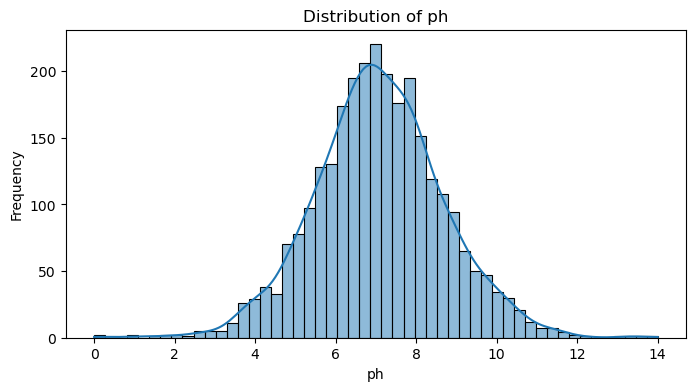

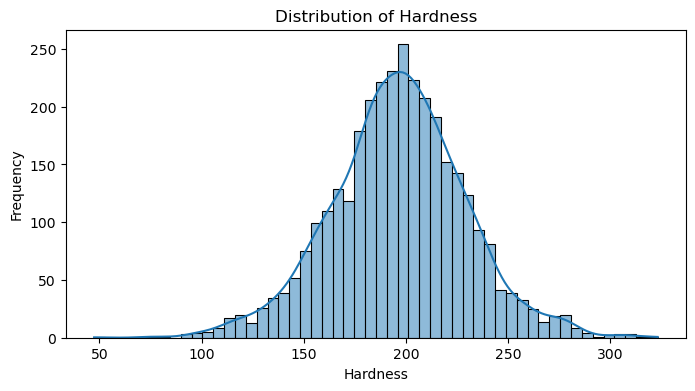

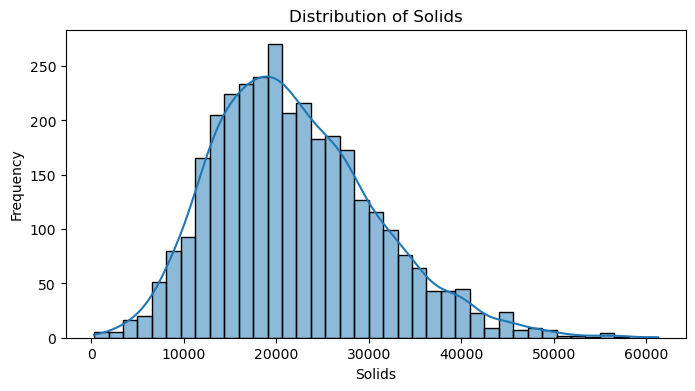

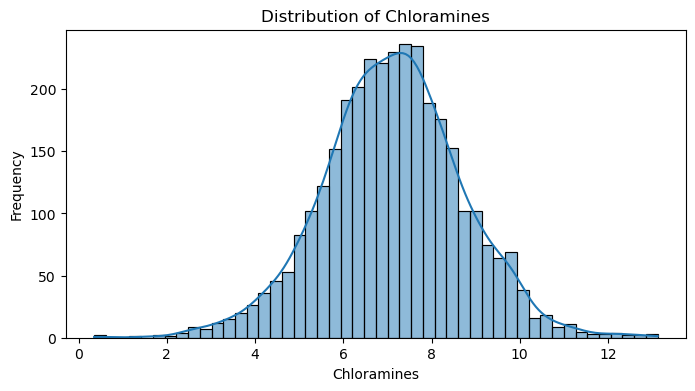

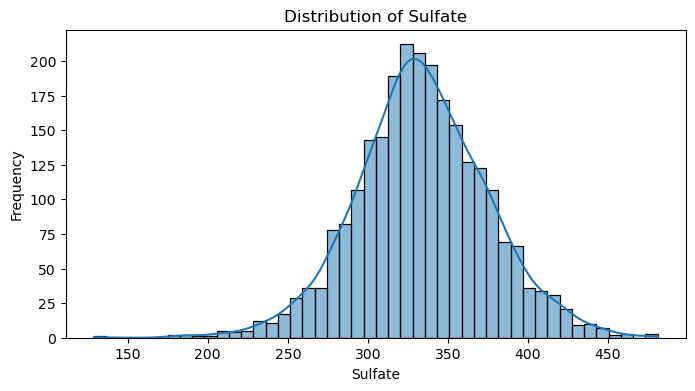

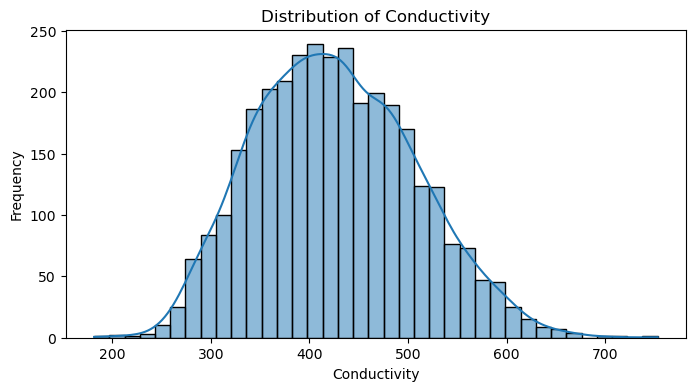

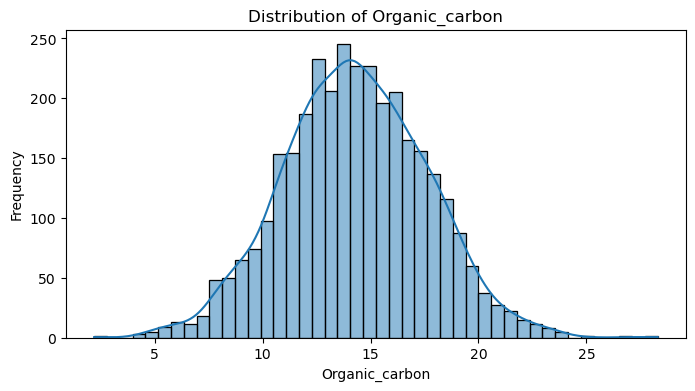

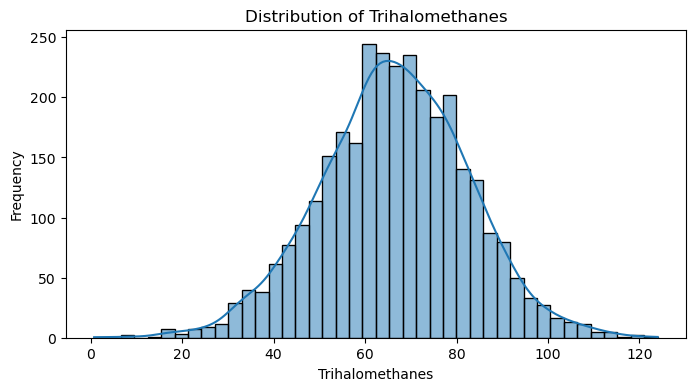

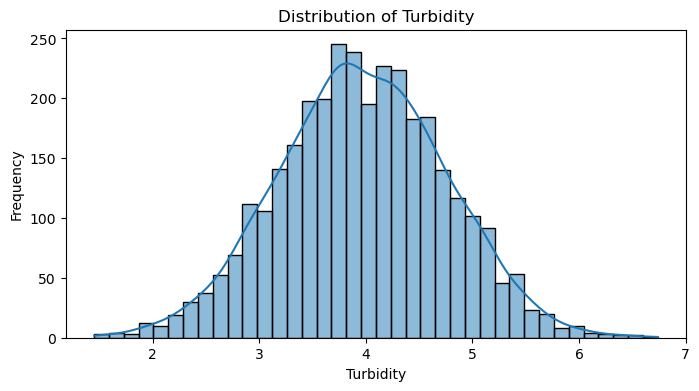

In [8]:
# check distribution of features
import seaborn as sns
import matplotlib.pyplot as plt
for column in X.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(X[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()